In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Loading

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
DATADIR = "C:/Users/Ahmed Essonoutty/Jupiter_Work_Space/Datasets/PlantVillage"

CATEGORIES = ["Pepper__bell___Bacterial_spot", "Pepper__bell___healthy","Potato___Early_blight","Potato___healthy","Potato___Late_blight","Tomato__Target_Spot","Tomato__Tomato_mosaic_virus",'Tomato_healthy']

In [3]:
IMG_SIZE = 80
#new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#plt.imshow(new_array)
#plt.show()

In [4]:
training_data = []
Labels = []
def create_training_data():
    for category in CATEGORIES:  #

        path = os.path.join(DATADIR,category)  
       
        if (category in ["Pepper__bell___Bacterial_spot","Potato___Early_blight","Potato___Late_blight","Tomato__Target_Spot","Tomato__Tomato_mosaic_virus"]):
            class_num=1;
        else:
            class_num=0;


        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append(new_array)  # add this to our training_data
                Labels.append(class_num)
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 1591/1591 [00:01<00:00, 905.42it/s]

7995


# Input data analysis

In [5]:
import pandas as pd
df=pd.DataFrame()

<BarContainer object of 2 artists>

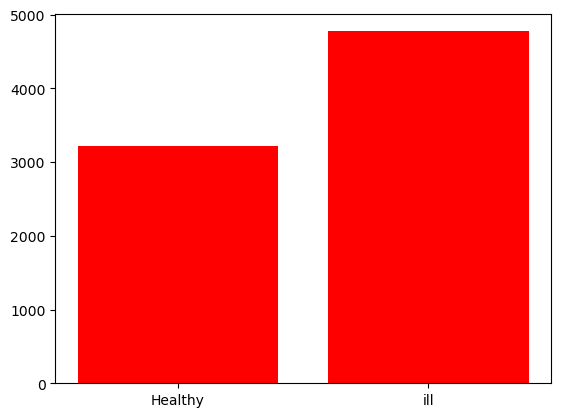

In [6]:
df["image"]=training_data
df["Labels"]=Labels
plt.figure()

plt.bar(['Healthy', 'ill'], [len(df[df["Labels"]==0]),len(df[df["Labels"]==1])], color='r')


In [7]:
df["Labels"].unique()

array([1, 0], dtype=int64)

splite data into traing data and test data

In [8]:
X_train, X_test, y_train, y_test =train_test_split(df["image"], df["Labels"], random_state = 1)

In [9]:
del [df]

<BarContainer object of 4 artists>

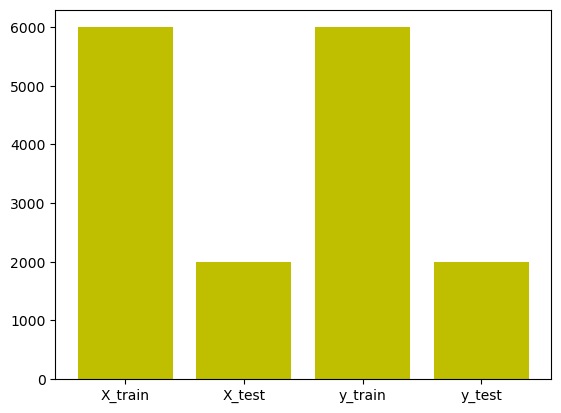

In [10]:
plt.figure()
xvals = range(len([len(X_train), len(X_test), len(y_train), len(y_test)]))
plt.bar(['X_train', 'X_test', 'y_train', 'y_test'], [len(X_train), len(X_test), len(y_train), len(y_test)], color='y')


Converting a datafram to a tensor(multi-dimantional Array)

In [11]:
X=tf.convert_to_tensor(list(X_train.values))

In [12]:
y=y_train.values

In [13]:
X.dtype

tf.int32

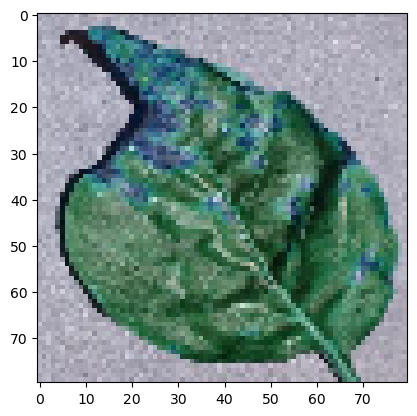

In [14]:
exambe=10
plt.imshow(X[exambe])
plt.show()
    

-----

--------

# Model creation

In [15]:
X = X/256
X.shape

TensorShape([5996, 80, 80, 3])

In [16]:
X[2]

<tf.Tensor: shape=(80, 80, 3), dtype=float64, numpy=
array([[[0.65234375, 0.5859375 , 0.59765625],
        [0.64453125, 0.578125  , 0.58984375],
        [0.66015625, 0.59375   , 0.60546875],
        ...,
        [0.5390625 , 0.47265625, 0.48828125],
        [0.5703125 , 0.50390625, 0.515625  ],
        [0.58203125, 0.515625  , 0.53125   ]],

       [[0.6640625 , 0.59765625, 0.609375  ],
        [0.65234375, 0.5859375 , 0.59765625],
        [0.64453125, 0.578125  , 0.58984375],
        ...,
        [0.5625    , 0.49609375, 0.51171875],
        [0.58984375, 0.5234375 , 0.5390625 ],
        [0.5546875 , 0.48828125, 0.50390625]],

       [[0.66796875, 0.6015625 , 0.61328125],
        [0.6640625 , 0.59765625, 0.609375  ],
        [0.671875  , 0.60546875, 0.6171875 ],
        ...,
        [0.59765625, 0.53125   , 0.546875  ],
        [0.546875  , 0.48046875, 0.49609375],
        [0.5546875 , 0.48828125, 0.50390625]],

       ...,

       [[0.56640625, 0.51953125, 0.54296875],
        [0.5625

In [22]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(80,80,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.39))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.36))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Dropout(0.39))
model.add(Dense(32))
model.add(Dropout(0.39))
model.add(Dense(1))

model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 78, 78, 256)       7168      
_________________________________________________________________
activation_6 (Activation)    (None, 78, 78, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 39, 39, 256)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 256)       590080    
_________________________________________________________________
activation_7 (Activation)    (None, 37, 37, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 256)      

In [23]:
model.fit(X,y, batch_size=20, epochs=40, validation_split=0.2)

Epoch 1/40
240/240 [==============================] - 8s 35ms/step - loss: 0.7052 - accuracy: 0.5951 - val_loss: 0.6852 - val_accuracy: 0.5808
Epoch 2/40
240/240 [==============================] - 8s 34ms/step - loss: 0.6501 - accuracy: 0.6245 - val_loss: 0.6734 - val_accuracy: 0.6100
Epoch 3/40
240/240 [==============================] - 8s 34ms/step - loss: 0.6069 - accuracy: 0.6478 - val_loss: 0.6545 - val_accuracy: 0.6100
Epoch 4/40
240/240 [==============================] - 8s 34ms/step - loss: 0.6240 - accuracy: 0.6401 - val_loss: 0.6189 - val_accuracy: 0.6500
Epoch 5/40
240/240 [==============================] - 8s 34ms/step - loss: 0.6077 - accuracy: 0.6455 - val_loss: 0.6258 - val_accuracy: 0.6275
Epoch 6/40
240/240 [==============================] - 8s 34ms/step - loss: 0.5834 - accuracy: 0.6685 - val_loss: 0.5905 - val_accuracy: 0.6542
Epoch 7/40
240/240 [==============================] - 8s 34ms/step - loss: 0.5509 - accuracy: 0.7081 - val_loss: 0.5471 - val_accuracy: 0.7867

In [25]:
model.save_weights('secound_try.h5')  # always save your weights after training or during training

In [30]:
model.save('Untitled Folder')

INFO:tensorflow:Assets written to: Untitled Folder\assets


# Testing

In [31]:
from tensorflow.keras.models import load_model
model = load_model('Untitled Folder')
#loaded_model.load_weights("model.h5"

In [46]:
# A few random samples
use_samples = [88, 50, 123, 399]
samples_to_predict = []
samples_stat=[]
# Generate plots for samples 
for sample in use_samples:
    # Add sample to array for prediction
    samples_to_predict.append(X_test.iloc[sample])
    samples_stat.append(y_test.iloc[sample])

In [47]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(4, 80, 80, 3)


The right value is  1


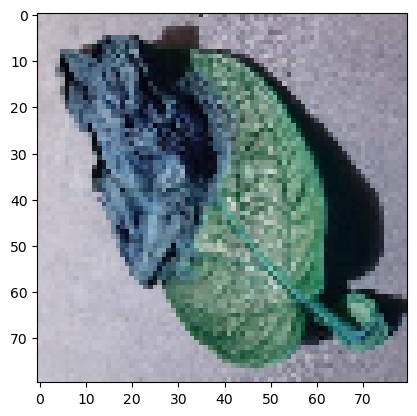

ill plant
____________________________________________________
The right value is  1


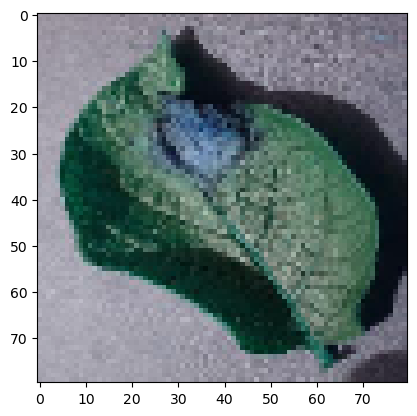

ill plant
____________________________________________________
The right value is  1


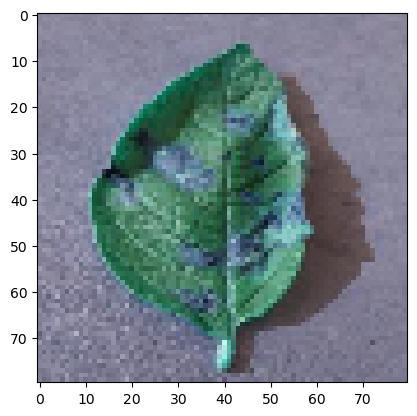

ill plant
____________________________________________________
The right value is  0


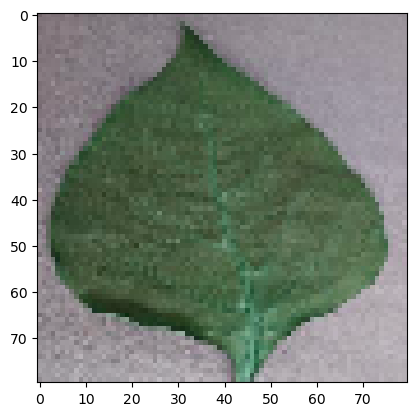

Healthy plant
____________________________________________________


In [48]:
# Generate predictions for samples
predictions = model.predict(samples_to_predict)
counter=0;
for  prediction in predictions:
    print('The right value is ',samples_stat[counter])
    plt.imshow(samples_to_predict[counter])
    plt.show()
    counter=counter+1;
    if prediction>0.5:
        print("ill plant")
    else: 
        print("Healthy plant")
    print("____________________________________________________")

Show exambles of misticks in predection

In [53]:
XTest=tf.convert_to_tensor(list(X_test.values))

In [62]:
predictions_list = model.predict(XTest)
predictions_list

array([[1.8268850e-36],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [2.6125413e-11],
       [1.0070983e-21],
       [0.0000000e+00]], dtype=float32)

In [66]:
myList = np.rint(predictions_list)
len(myList)

1999

In [72]:
mistakesIndex=[]
for i in range(len(myList)):
    if not(myList[i]==y_test.values[i]):
        mistakesIndex.append(i)
    
len(mistakesIndex)

478

In [76]:
print('ERROR: ',(len(mistakesIndex)/len(myList))*100)

ERROR:  23.911955977988995


Not!!
0=>healthy
1=>ill
right value: 1
Predection: 0


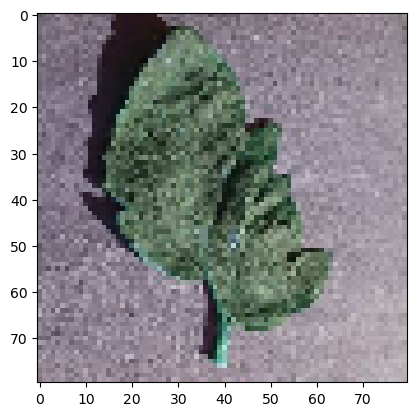

right value: 1
Predection: 0


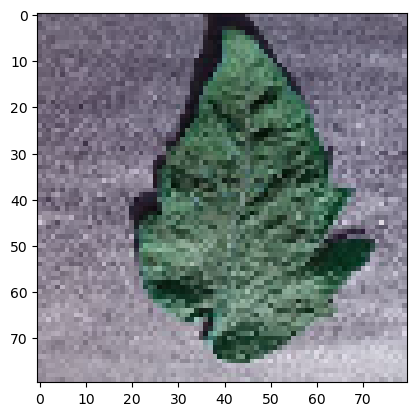

right value: 1
Predection: 0


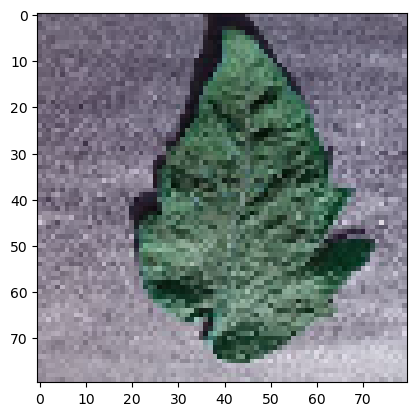

right value: 1
Predection: 0


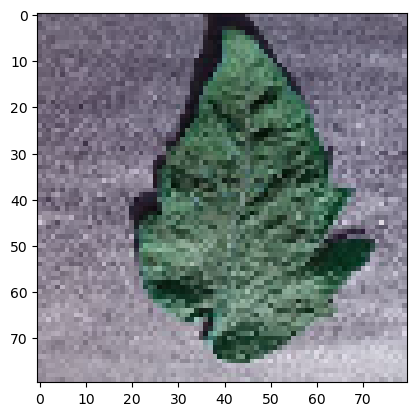

right value: 1
Predection: 0


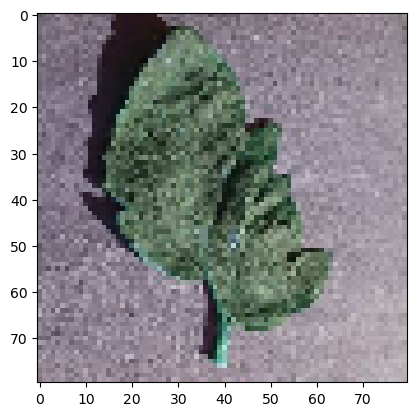

right value: 1
Predection: 0


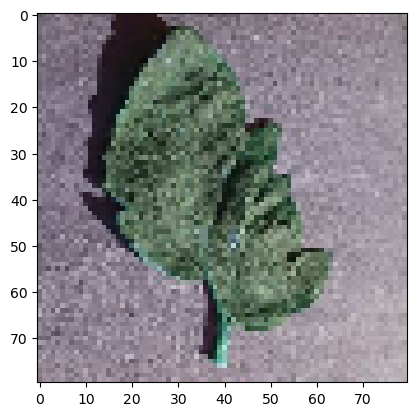

right value: 1
Predection: 0


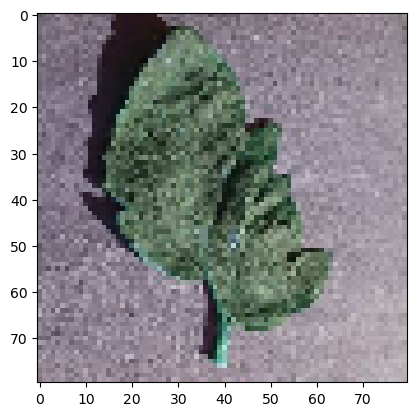

right value: 0
Predection: 1


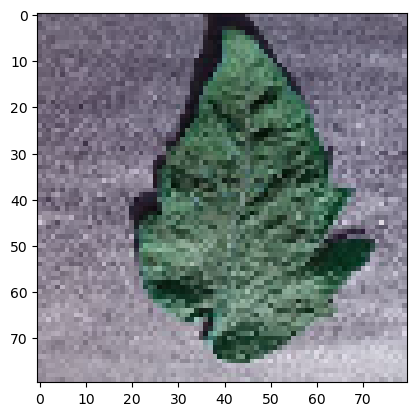

In [92]:
number_of_ex=8
print("Not!!")
print("0=>healthy")
print("1=>ill")
for i in range(number_of_ex):
    print("right value:",y_test.values[mistakesIndex[i]])
    print("Predection:",int(myList[mistakesIndex[i]]))
    plt.imshow(XTest[int(myList[i])])
    plt.show()
    

We have almost the same to picture which is hard to humen to know if they are ill